# Ch08_1.로지스틱 회귀  함수

In [1]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환
from sklearn import datasets # python 저장 데이터 가져오기

In [2]:
tiny_df = pd.read_csv('tinydata.csv')
tiny_df.head()

,Obs.,Fat,Salt,Acceptance
0,1,0.2,0.9,like
1,2,0.1,0.1,dislike
2,3,0.2,0.4,dislike
3,4,0.2,0.5,dislike
4,5,0.4,0.5,like


In [3]:
X = tiny_df.drop (['Obs.','Acceptance'], axis=1)
X.head()

,Fat,Salt
0,0.2,0.9
1,0.1,0.1
2,0.2,0.4
3,0.2,0.5
4,0.4,0.5


In [4]:
y = tiny_df['Acceptance']
y = y.replace (['like','dislike'], [1,0])
y.head()

0    1
1    0
2    0
3    0
4    1
Name: Acceptance, dtype: int64

In [5]:
class LogisticGD(object):

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        
        # rgen = np.random.RandomState(self.random_state)
        # self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        self.w_ = [-0.3, 0.05, 0.01]
        self.cost_ = []

        for i in range(self.n_iter):

            print('== 에포크')
            print('n_iter', i)
            print('')

            print('== 초기 가중치(w)')
            print('self.w_: ', self.w_)         
            print('')
                      
            z = self.net_input(X)
            print('== 결합함수(z)')
            print('z: ', z)
            print('')

            h = self.activation(z)
            print('== 활성함수(h)')
            print('h: ', h)
            print('')

            errors =  (y - h)
            print('== 에러')
            print('errors: ')
            print(errors)
            print('')

            self.w_[1:] += self.eta * X.T.dot(errors)
            print('== 가중치 업데이트(X)')
            print('X.T.dot(errors): ', X.T.dot(errors))
            print('self.eta * X.T.dot(errors): ', self.eta * X.T.dot(errors))
            print('self.w_[1:]: ', self.w_[1:])         
            print('')

            self.w_[0] += self.eta * errors.sum()
            print('== 가중치 업데이트(b)')
            print('errors.sum(): ', errors.sum())
            print('self.eta * errors.sum(): ', self.eta * errors.sum())
            print('self.w_[0]: ', self.w_[0])
            print('')

            print('== 최종 가중치(전체)')
            print('self.w: ', self.w_)
            print('')
          
            cost = -y.dot(np.log(h)) - ((1 - y).dot(np.log(1 - h)))
            print('== 비용함수(J)')
            print('cost: ', cost)
            print('')
            
            self.cost_.append(cost)
            
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """선형 활성화 계산"""
        ## np.clip(값, 최소값, 최대값): 최소, 최대값을 벗어나면 최소, 최대값으로 대체, 261 -> 250
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, 0)

In [6]:
logistic = LogisticGD(n_iter = 100, eta = 0.2)
logistic.fit(X, y)

== 에포크
n_iter 0

== 초기 가중치(w)
self.w_:  [-0.3, 0.05, 0.01]

== 결합함수(z)
z:  [-0.281 -0.294 -0.286 -0.285 -0.275 -0.277]

== 활성함수(h)
h:  [0.43020863 0.42702488 0.42898341 0.42922839 0.43168002 0.43118942]

== 에러
errors: 
0    0.569791
1   -0.427025
2   -0.428983
3   -0.429228
4    0.568320
5    0.568811
Name: Acceptance, dtype: float64

== 가중치 업데이트(X)
X.T.dot(errors):  Fat     0.297585
Salt    0.823111
dtype: float64
self.eta * X.T.dot(errors):  Fat     0.059517
Salt    0.164622
dtype: float64
self.w_[1:]:  [0.10951691857915814, 0.17462212832990065]

== 가중치 업데이트(b)
errors.sum():  0.42168524844191835
self.eta * errors.sum():  0.08433704968838368
self.w_[0]:  -0.2156629503116163

== 최종 가중치(전체)
self.w:  [-0.2156629503116163, 0.10951691857915814, 0.17462212832990065]

== 비용함수(J)
cost:  4.202779610365861

== 에포크
n_iter 1

== 초기 가중치(w)
self.w_:  [-0.2156629503116163, 0.10951691857915814, 0.17462212832990065]

== 결합함수(z)
z:  [-0.03659965 -0.18724905 -0.12391072 -0.1064485  -0.08454512 -0.043110

h:  [0.65272169 0.37552165 0.48767914 0.52167894 0.54711061 0.63322501]

== 에러
errors: 
0    0.347278
1   -0.375522
2   -0.487679
3   -0.521679
4    0.452889
5    0.366775
Name: Acceptance, dtype: float64

== 가중치 업데이트(X)
X.T.dot(errors):  Fat     0.121220
Salt    0.338952
dtype: float64
self.eta * X.T.dot(errors):  Fat     0.024244
Salt    0.067790
dtype: float64
self.w_[1:]:  [0.5354086689378244, 1.428425890952842]

== 가중치 업데이트(b)
errors.sum():  -0.21793704782440892
self.eta * errors.sum():  -0.04358740956488179
self.w_[0]:  -0.7393679494669715

== 최종 가중치(전체)
self.w:  [-0.7393679494669715, 0.5354086689378244, 1.428425890952842]

== 비용함수(J)
cost:  3.3637540642412302

== 에포크
n_iter 16

== 초기 가중치(w)
self.w_:  [-0.7393679494669715, 0.5354086689378244, 1.428425890952842]

== 결합함수(z)
z:  [ 0.65329709 -0.54298449 -0.06091586  0.08192673  0.18900846  0.56399536]

== 활성함수(h)
h:  [0.65775307 0.36749359 0.48477574 0.52047023 0.54711195 0.63737649]

== 에러
errors: 
0    0.342247
1   -0.367494
2   

== 가중치 업데이트(X)
X.T.dot(errors):  Fat     0.113217
Salt    0.271545
dtype: float64
self.eta * X.T.dot(errors):  Fat     0.022643
Salt    0.054309
dtype: float64
self.w_[1:]:  [0.8856399465419508, 2.3316324420045316]

== 가중치 업데이트(b)
errors.sum():  -0.1789154560811097
self.eta * errors.sum():  -0.03578309121622194
self.w_[0]:  -1.3276081128388

== 최종 가중치(전체)
self.w:  [-1.3276081128388, 0.8856399465419508, 2.3316324420045316]

== 비용함수(J)
cost:  2.9253559496780195

== 에포크
n_iter 31

== 초기 가중치(w)
self.w_:  [-1.3276081128388, 0.8856399465419508, 2.3316324420045316]

== 결합함수(z)
z:  [ 0.94798907 -1.00588087 -0.21782715  0.0153361   0.19246409  0.80338982]

== 활성함수(h)
h:  [0.72071058 0.26778674 0.44575752 0.50383395 0.54796804 0.69069913]

== 에러
errors: 
0    0.279289
1   -0.267787
2   -0.445758
3   -0.503834
4    0.452032
5    0.309301
Name: Acceptance, dtype: float64

== 가중치 업데이트(X)
X.T.dot(errors):  Fat     0.112764
Salt    0.267818
dtype: float64
self.eta * X.T.dot(errors):  Fat     0.022553

self.eta * X.T.dot(errors):  Fat     0.021382
Salt    0.044161
dtype: float64
self.w_[1:]:  [1.236701910329902, 3.109574404203283]

== 가중치 업데이트(b)
errors.sum():  -0.149596843512813
self.eta * errors.sum():  -0.0299193687025626
self.w_[0]:  -1.8475199757463268

== 최종 가중치(전체)
self.w:  [-1.8475199757463268, 1.236701910329902, 3.109574404203283]

== 비용함수(J)
cost:  2.6069612378655527

== 에포크
n_iter 47

== 초기 가중치(w)
self.w_:  [-1.8475199757463268, 1.236701910329902, 3.109574404203283]

== 결합함수(z)
z:  [ 1.19843737 -1.41289234 -0.35634983 -0.04539239  0.20194799  1.01115012]

== 활성함수(h)
h:  [0.76824668 0.19577826 0.41184345 0.48865385 0.55031611 0.73324517]

== 에러
errors: 
0    0.231753
1   -0.195778
2   -0.411843
3   -0.488654
4    0.449684
5    0.266755
Name: Acceptance, dtype: float64

== 가중치 업데이트(X)
X.T.dot(errors):  Fat     0.106573
Salt    0.218182
dtype: float64
self.eta * X.T.dot(errors):  Fat     0.021315
Salt    0.043636
dtype: float64
self.w_[1:]:  [1.2580165866171331, 3.15321073641

n_iter 64

== 초기 가중치(w)
self.w_:  [-2.314492951650346, 1.590824665349812, 3.7881872827823257]

== 결합함수(z)
z:  [ 1.41304054 -1.77659176 -0.48105311 -0.10223438  0.21593056  1.19330427]

== 활성함수(h)
h:  [0.80424507 0.14472449 0.38200348 0.47446364 0.55377386 0.76733151]

== 에러
errors: 
0    0.195755
1   -0.144724
2   -0.382003
3   -0.474464
4    0.446226
5    0.232668
Name: Acceptance, dtype: float64

== 가중치 업데이트(X)
X.T.dot(errors):  Fat     0.101676
Salt    0.180922
dtype: float64
self.eta * X.T.dot(errors):  Fat     0.020335
Salt    0.036184
dtype: float64
self.w_[1:]:  [1.6111598879577431, 3.824371609050262]

== 가중치 업데이트(b)
errors.sum():  -0.12654206370437926
self.eta * errors.sum():  -0.025308412740875853
self.w_[0]:  -2.339801364391222

== 최종 가중치(전체)
self.w:  [-2.339801364391222, 1.6111598879577431, 3.824371609050262]

== 비용함수(J)
cost:  2.3546264514247577

== 에포크
n_iter 65

== 초기 가중치(w)
self.w_:  [-2.339801364391222, 1.6111598879577431, 3.824371609050262]

== 결합함수(z)
z:  [ 1.42436506

self.w_[0]:  -2.6959909264745727

== 최종 가중치(전체)
self.w:  [-2.6959909264745727, 1.9106051735591527, 4.326817377147207]

== 비용함수(J)
cost:  2.196275579697643

== 에포크
n_iter 80

== 초기 가중치(w)
self.w_:  [-2.6959909264745727, 1.9106051735591527, 4.326817377147207]

== 결합함수(z)
z:  [ 1.58026575 -2.07224867 -0.58314294 -0.1504612   0.23165983  1.33864453]

== 활성함수(h)
h:  [0.82924215 0.11182351 0.35820972 0.4624555  0.55765733 0.79226695]

== 에러
errors: 
0    0.170758
1   -0.111824
2   -0.358210
3   -0.462456
4    0.442343
5    0.207733
Name: Acceptance, dtype: float64

== 가중치 업데이트(X)
X.T.dot(errors):  Fat     0.098093
Salt    0.155346
dtype: float64
self.eta * X.T.dot(errors):  Fat     0.019619
Salt    0.031069
dtype: float64
self.w_[1:]:  [1.9302238048610763, 4.357886546939986]

== 가중치 업데이트(b)
errors.sum():  -0.11165516458909397
self.eta * errors.sum():  -0.022331032917818794
self.w_[0]:  -2.7183219593923917

== 최종 가중치(전체)
self.w:  [-2.7183219593923917, 1.9302238048610763, 4.357886546939986]

=


== 비용함수(J)
cost:  2.0532917793625147

== 에포크
n_iter 97

== 초기 가중치(w)
self.w_:  [-3.055440343321107, 2.2389867185642465, 4.820583135701366]

== 결합함수(z)
z:  [ 1.73088182 -2.34948336 -0.67940975 -0.19735143  0.25044591  1.47272218]

== 활성함수(h)
h:  [0.84952518 0.08710685 0.33639305 0.45082165 0.56228625 0.81347079]

== 에러
errors: 
0    0.150475
1   -0.087107
2   -0.336393
3   -0.450822
4    0.437714
5    0.186529
Name: Acceptance, dtype: float64

== 가중치 업데이트(X)
X.T.dot(errors):  Fat     0.094986
Salt    0.134829
dtype: float64
self.eta * X.T.dot(errors):  Fat     0.018997
Salt    0.026966
dtype: float64
self.w_[1:]:  [2.257983838472635, 4.847548904813542]

== 가중치 업데이트(b)
errors.sum():  -0.09960377788066233
self.eta * errors.sum():  -0.019920755576132466
self.w_[0]:  -3.0753610988972393

== 최종 가중치(전체)
self.w:  [-3.0753610988972393, 2.257983838472635, 4.847548904813542]

== 비용함수(J)
cost:  2.045800888278894

== 에포크
n_iter 98

== 초기 가중치(w)
self.w_:  [-3.0753610988972393, 2.257983838472635, 4.

In [7]:
from sklearn.svm import SVC # 서포트 벡터 머신(SVM)
svm = SVC(random_state=1)

svm.fit(X, y)

C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

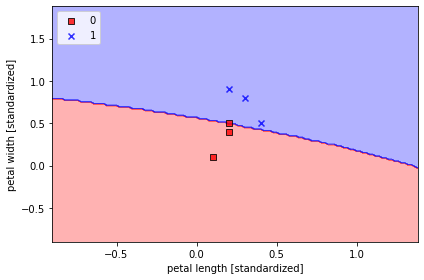

In [11]:
# 특성을 표준화합니다.
X_std = np.copy(X)

plot_decision_regions(X_std, y,
                      classifier=svm)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

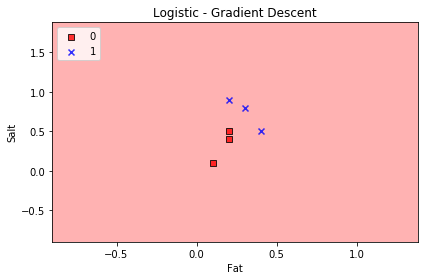

In [48]:
plot_decision_regions(X_std, y, classifier=logistic)
plt.title('Logistic - Gradient Descent')
plt.xlabel('Fat')
plt.ylabel('Salt')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

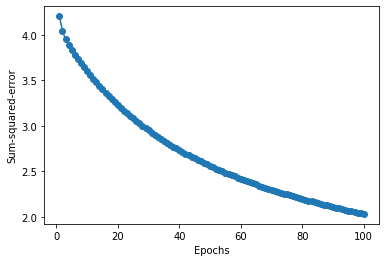

In [44]:
plt.plot(range(1, len(logistic.cost_) + 1), logistic.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.show()